# Máquinas de Soporte Vectorial (SVM)

**Support Vector Machines - Tutorial Completo**

## ¿Qué es SVM?

Las **Máquinas de Soporte Vectorial** son algoritmos de aprendizaje supervisado utilizados para:
- **Clasificación**: Separar datos en diferentes clases
- **Regresión**: Predecir valores continuos

### Concepto Principal

SVM busca encontrar el **hiperplano óptimo** que mejor separa las clases de datos, maximizando el **margen** entre ellas.

**Ventajas:**
- ✅ Efectivo en espacios de alta dimensión
- ✅ Funciona bien con datos no lineales (usando kernels)
- ✅ Robusto ante overfitting en dimensiones altas

**Desventajas:**
- ❌ Lento con conjuntos de datos grandes
- ❌ Sensible a la escala de los datos
- ❌ Difícil de interpretar con kernels complejos

---

## 1. Instalación e Importación de Librerías

In [1]:
# Importar librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR
from sklearn.metrics import (
    classification_report, 
    confusion_matrix, 
    accuracy_score,
    precision_score,
    recall_score,
    f1_score
)

# Configuración de visualización
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
np.random.seed(42)

print("Librerías importadas correctamente")

Librerías importadas correctamente


---

## 2. Preparación de los Datos

### 2.1 Cargar Dataset de Ejemplo: Iris

Usaremos el famoso dataset Iris que contiene medidas de flores con 3 especies diferentes.

In [2]:
# Cargar dataset Iris
iris = datasets.load_iris()

# Convertir a DataFrame para mejor visualización
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species_name'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

print("Información del Dataset:")
print(f"Forma del dataset: {df.shape}")
print(f"\nPrimeras filas:")
print(df.head())
print(f"\nClases: {iris.target_names}")
print(f"\nDescripción estadística:")
print(df.describe())

Información del Dataset:
Forma del dataset: (150, 6)

Primeras filas:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species species_name  
0        0       setosa  
1        0       setosa  
2        0       setosa  
3        0       setosa  
4        0       setosa  

Clases: ['setosa' 'versicolor' 'virginica']

Descripción estadística:
       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            5.843333          3.057333           3.758000   
std             0.828066         

### 2.2 Visualización Exploratoria de Datos

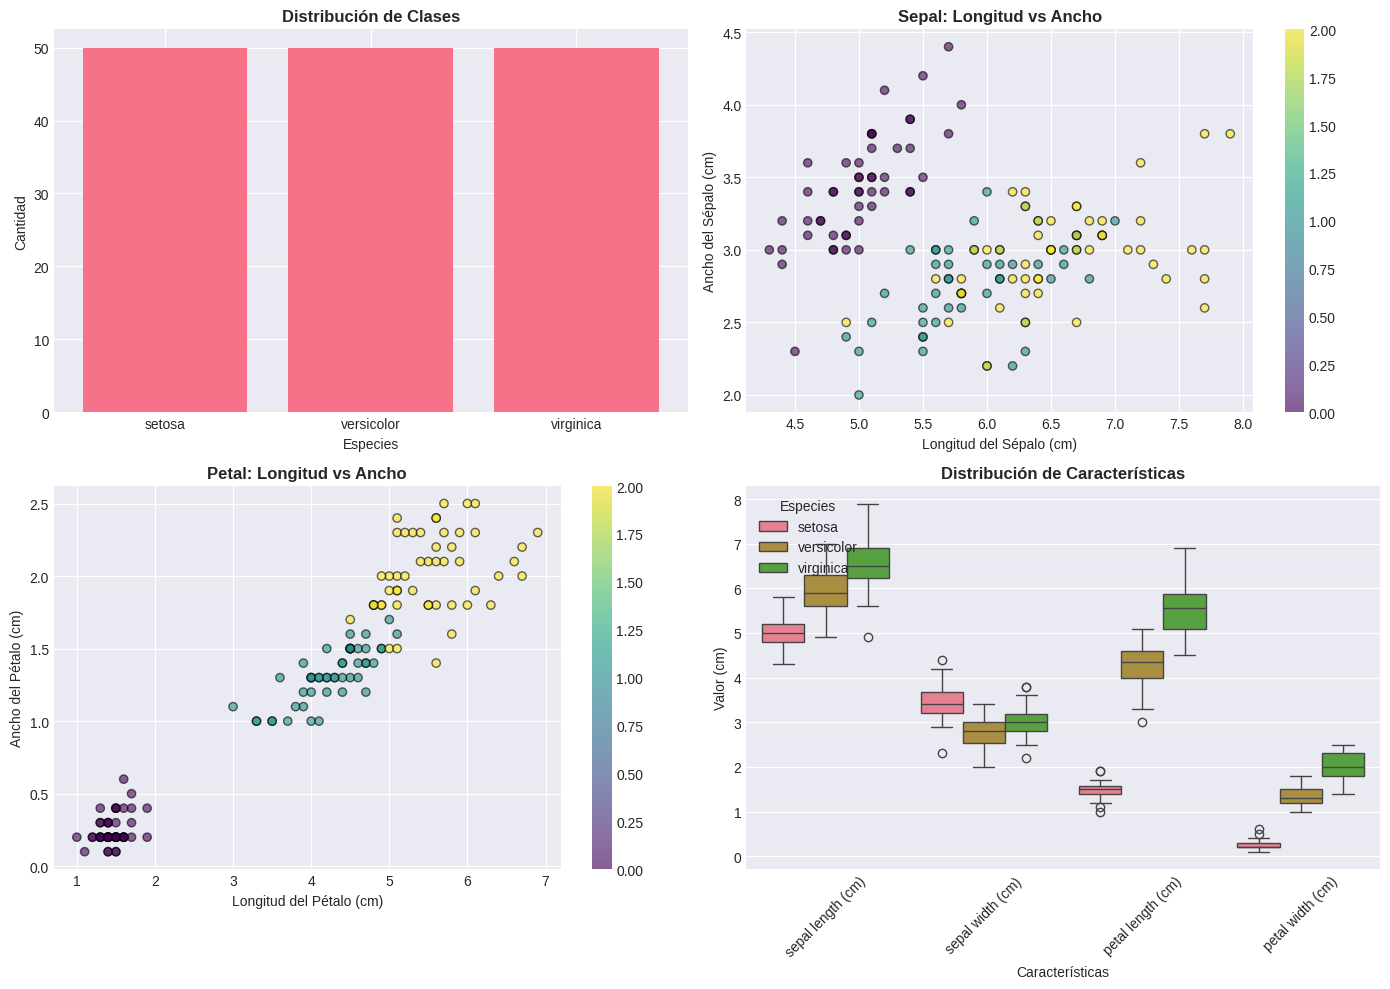

In [3]:
# Visualizar la distribución de las clases
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gráfico 1: Distribución de clases
axes[0, 0].bar(iris.target_names, np.bincount(iris.target))
axes[0, 0].set_title('Distribución de Clases', fontsize=12, fontweight='bold')
axes[0, 0].set_xlabel('Especies')
axes[0, 0].set_ylabel('Cantidad')

# Gráfico 2: Scatter plot - Sepal
scatter1 = axes[0, 1].scatter(df['sepal length (cm)'], df['sepal width (cm)'], 
                              c=df['species'], cmap='viridis', alpha=0.6, edgecolors='k')
axes[0, 1].set_title('Sepal: Longitud vs Ancho', fontsize=12, fontweight='bold')
axes[0, 1].set_xlabel('Longitud del Sépalo (cm)')
axes[0, 1].set_ylabel('Ancho del Sépalo (cm)')
plt.colorbar(scatter1, ax=axes[0, 1])

# Gráfico 3: Scatter plot - Petal
scatter2 = axes[1, 0].scatter(df['petal length (cm)'], df['petal width (cm)'], 
                              c=df['species'], cmap='viridis', alpha=0.6, edgecolors='k')
axes[1, 0].set_title('Petal: Longitud vs Ancho', fontsize=12, fontweight='bold')
axes[1, 0].set_xlabel('Longitud del Pétalo (cm)')
axes[1, 0].set_ylabel('Ancho del Pétalo (cm)')
plt.colorbar(scatter2, ax=axes[1, 0])

# Gráfico 4: Box plot
df_melted = df.melt(id_vars=['species_name'], 
                     value_vars=['sepal length (cm)', 'sepal width (cm)', 
                                'petal length (cm)', 'petal width (cm)'])
sns.boxplot(data=df_melted, x='variable', y='value', hue='species_name', ax=axes[1, 1])
axes[1, 1].set_title('Distribución de Características', fontsize=12, fontweight='bold')
axes[1, 1].set_xlabel('Características')
axes[1, 1].set_ylabel('Valor (cm)')
axes[1, 1].tick_params(axis='x', rotation=45)
axes[1, 1].legend(title='Especies', loc='upper left')

plt.tight_layout()
plt.show()

### 2.3 Preparación y División de Datos

In [4]:
# Separar características (X) y etiquetas (y)
X = iris.data
y = iris.target

print(f"Forma de X (características): {X.shape}")
print(f"Forma de y (etiquetas): {y.shape}")

# Dividir en conjuntos de entrenamiento y prueba (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\nDivisión de datos:")
print(f"Entrenamiento: {X_train.shape[0]} muestras ({(X_train.shape[0]/len(X)*100):.1f}%)")
print(f"Prueba: {X_test.shape[0]} muestras ({(X_test.shape[0]/len(X)*100):.1f}%)")

# IMPORTANTE: Normalizar los datos (SVM es sensible a la escala)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nEstadísticas después de normalización:")
print(f"Media de entrenamiento: {X_train_scaled.mean(axis=0).round(2)}")
print(f"Desviación estándar de entrenamiento: {X_train_scaled.std(axis=0).round(2)}")

Forma de X (características): (150, 4)
Forma de y (etiquetas): (150,)

División de datos:
Entrenamiento: 120 muestras (80.0%)
Prueba: 30 muestras (20.0%)

Estadísticas después de normalización:
Media de entrenamiento: [-0. -0.  0.  0.]
Desviación estándar de entrenamiento: [1. 1. 1. 1.]


---

## 3. Entrenamiento del Modelo SVM

### 3.1 SVM con Kernel Lineal

In [5]:
# Crear y entrenar el modelo SVM con kernel lineal
svm_linear = SVC(kernel='linear', C=1.0, random_state=42)

print("Entrenando SVM con kernel lineal...")
svm_linear.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred_linear = svm_linear.predict(X_test_scaled)

# Evaluar el modelo
accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"\nModelo entrenado!")
print(f"Precisión (Accuracy): {accuracy_linear:.4f} ({accuracy_linear*100:.2f}%)")
print(f"Vectores de soporte: {len(svm_linear.support_vectors_)}")

# Reporte de clasificación detallado
print(f"\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_linear, target_names=iris.target_names))

Entrenando SVM con kernel lineal...

Modelo entrenado!
Precisión (Accuracy): 1.0000 (100.00%)
Vectores de soporte: 23

Reporte de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00        10
   virginica       1.00      1.00      1.00        10

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### 3.2 SVM con Kernel RBF (Radial Basis Function)

El kernel RBF es útil para datos no lineales.

In [6]:
# Crear y entrenar el modelo SVM con kernel RBF
svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

print("Entrenando SVM con kernel RBF...")
svm_rbf.fit(X_train_scaled, y_train)

# Realizar predicciones
y_pred_rbf = svm_rbf.predict(X_test_scaled)

# Evaluar el modelo
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"\nModelo entrenado!")
print(f"Precisión (Accuracy): {accuracy_rbf:.4f} ({accuracy_rbf*100:.2f}%)")
print(f"Vectores de soporte: {len(svm_rbf.support_vectors_)}")

# Reporte de clasificación
print(f"\nReporte de Clasificación:")
print(classification_report(y_test, y_pred_rbf, target_names=iris.target_names))

Entrenando SVM con kernel RBF...

Modelo entrenado!
Precisión (Accuracy): 0.9667 (96.67%)
Vectores de soporte: 47

Reporte de Clasificación:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



### 3.3 Comparación de Modelos

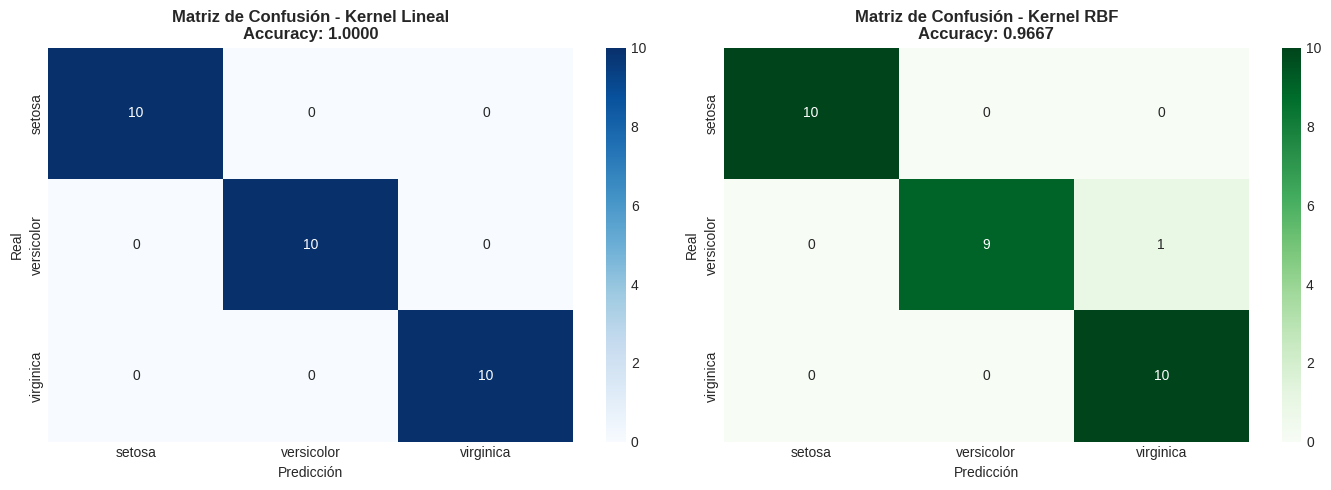

Comparación de Modelos:

Métrica              Lineal          RBF            
--------------------------------------------------
Accuracy             1.0000          0.9667
Vectores de soporte  23              47             


In [7]:
# Matrices de confusión
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Matriz de confusión - Kernel Lineal
cm_linear = confusion_matrix(y_test, y_pred_linear)
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, yticklabels=iris.target_names, ax=axes[0])
axes[0].set_title(f'Matriz de Confusión - Kernel Lineal\nAccuracy: {accuracy_linear:.4f}', 
                  fontsize=12, fontweight='bold')
axes[0].set_xlabel('Predicción')
axes[0].set_ylabel('Real')

# Matriz de confusión - Kernel RBF
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Greens', 
            xticklabels=iris.target_names, yticklabels=iris.target_names, ax=axes[1])
axes[1].set_title(f'Matriz de Confusión - Kernel RBF\nAccuracy: {accuracy_rbf:.4f}', 
                  fontsize=12, fontweight='bold')
axes[1].set_xlabel('Predicción')
axes[1].set_ylabel('Real')

plt.tight_layout()
plt.show()

# Comparación de métricas
print("Comparación de Modelos:\n")
print(f"{'Métrica':<20} {'Lineal':<15} {'RBF':<15}")
print("-" * 50)
print(f"{'Accuracy':<20} {accuracy_linear:.4f}          {accuracy_rbf:.4f}")
print(f"{'Vectores de soporte':<20} {len(svm_linear.support_vectors_):<15} {len(svm_rbf.support_vectors_):<15}")

---

## 4. Optimización de Hiperparámetros

Usaremos **GridSearchCV** para encontrar los mejores parámetros.

In [8]:
# Definir los parámetros a probar
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'kernel': ['rbf', 'linear']
}

print("Buscando mejores hiperparámetros...")
print(f"Parámetros a probar: {param_grid}\n")

# Crear GridSearchCV
grid_search = GridSearchCV(
    SVC(random_state=42), 
    param_grid, 
    cv=5,  # Validación cruzada con 5 folds
    scoring='accuracy',
    n_jobs=-1,  # Usar todos los procesadores
    verbose=1
)

# Entrenar
grid_search.fit(X_train_scaled, y_train)

# Mejores parámetros
print(f"\nBúsqueda completada!")
print(f"\nMejores parámetros encontrados:")
for param, value in grid_search.best_params_.items():
    print(f"  • {param}: {value}")

print(f"\nMejor puntuación (CV): {grid_search.best_score_:.4f}")

# Evaluar con el mejor modelo
best_svm = grid_search.best_estimator_
y_pred_best = best_svm.predict(X_test_scaled)
accuracy_best = accuracy_score(y_test, y_pred_best)

print(f"Precisión en test: {accuracy_best:.4f} ({accuracy_best*100:.2f}%)")

Buscando mejores hiperparámetros...
Parámetros a probar: {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1], 'kernel': ['rbf', 'linear']}

Fitting 5 folds for each of 48 candidates, totalling 240 fits

Búsqueda completada!

Mejores parámetros encontrados:
  • C: 1
  • gamma: 0.1
  • kernel: rbf

Mejor puntuación (CV): 0.9833
Precisión en test: 0.9667 (96.67%)

Búsqueda completada!

Mejores parámetros encontrados:
  • C: 1
  • gamma: 0.1
  • kernel: rbf

Mejor puntuación (CV): 0.9833
Precisión en test: 0.9667 (96.67%)


---

## 5. Uso de Predicciones

### 5.1 Predicciones con Nuevos Datos

In [9]:
# Crear nuevas muestras para predecir
nuevas_flores = np.array([
    [5.1, 3.5, 1.4, 0.2],  # Similar a Setosa
    [6.5, 3.0, 5.2, 2.0],  # Similar a Virginica
    [5.9, 3.0, 4.2, 1.5],  # Similar a Versicolor
    [4.8, 3.0, 1.4, 0.1],  # Similar a Setosa
    [7.0, 3.2, 4.7, 1.4]   # Similar a Versicolor
])

print("Nuevas flores a clasificar:")
print("\nSepal Length | Sepal Width | Petal Length | Petal Width")
print("-" * 60)
for i, flor in enumerate(nuevas_flores):
    print(f"Flor {i+1}:  {flor[0]:>6.1f}   |   {flor[1]:>6.1f}   |   {flor[2]:>7.1f}   |   {flor[3]:>6.1f}")

# IMPORTANTE: Normalizar las nuevas muestras con el mismo scaler
nuevas_flores_scaled = scaler.transform(nuevas_flores)

# Realizar predicciones
predicciones = best_svm.predict(nuevas_flores_scaled)

# Obtener probabilidades (si el modelo lo soporta)
# Para SVM necesitamos usar probability=True en el constructor
svm_prob = SVC(kernel=best_svm.kernel, C=best_svm.C, gamma=best_svm.gamma, 
               probability=True, random_state=42)
svm_prob.fit(X_train_scaled, y_train)
probabilidades = svm_prob.predict_proba(nuevas_flores_scaled)

# Mostrar resultados
print(f"\nPredicciones:\n")
for i, (pred, prob) in enumerate(zip(predicciones, probabilidades)):
    print(f"Flor {i+1}: {iris.target_names[pred].upper()}")
    print(f"  Confianzas: Setosa={prob[0]:.3f}, Versicolor={prob[1]:.3f}, Virginica={prob[2]:.3f}")
    print()

Nuevas flores a clasificar:

Sepal Length | Sepal Width | Petal Length | Petal Width
------------------------------------------------------------
Flor 1:     5.1   |      3.5   |       1.4   |      0.2
Flor 2:     6.5   |      3.0   |       5.2   |      2.0
Flor 3:     5.9   |      3.0   |       4.2   |      1.5
Flor 4:     4.8   |      3.0   |       1.4   |      0.1
Flor 5:     7.0   |      3.2   |       4.7   |      1.4

Predicciones:

Flor 1: SETOSA
  Confianzas: Setosa=0.977, Versicolor=0.015, Virginica=0.008

Flor 2: VIRGINICA
  Confianzas: Setosa=0.010, Versicolor=0.048, Virginica=0.942

Flor 3: VERSICOLOR
  Confianzas: Setosa=0.011, Versicolor=0.956, Virginica=0.033

Flor 4: SETOSA
  Confianzas: Setosa=0.964, Versicolor=0.024, Virginica=0.011

Flor 5: VERSICOLOR
  Confianzas: Setosa=0.019, Versicolor=0.889, Virginica=0.092



### 5.2 Visualización de Fronteras de Decisión

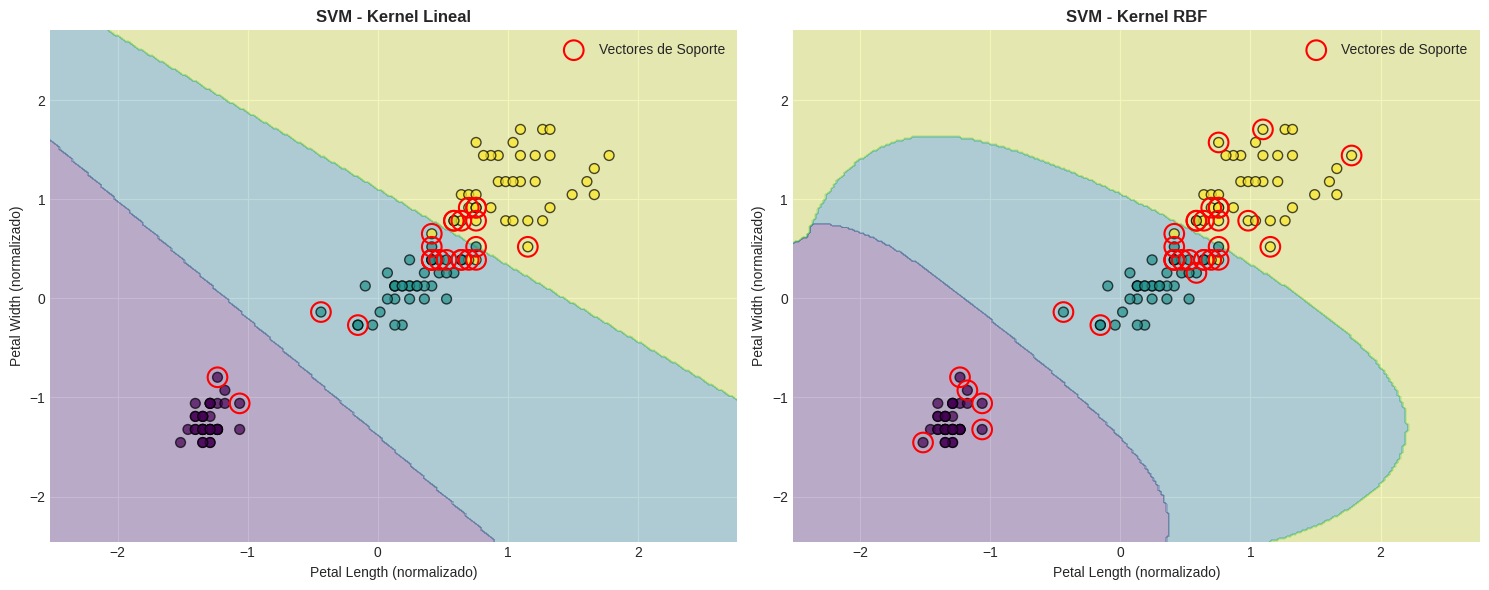

Vectores de soporte (Lineal): 24
Vectores de soporte (RBF): 32


In [10]:
# Visualizar fronteras de decisión (solo con 2 características para visualización 2D)
# Usaremos las características más informativas: petal length y petal width

X_2d = iris.data[:, [2, 3]]  # Petal length y width
X_2d_train, X_2d_test, y_2d_train, y_2d_test = train_test_split(
    X_2d, y, test_size=0.2, random_state=42, stratify=y
)

# Normalizar
scaler_2d = StandardScaler()
X_2d_train_scaled = scaler_2d.fit_transform(X_2d_train)
X_2d_test_scaled = scaler_2d.transform(X_2d_test)

# Entrenar modelos 2D
svm_2d_linear = SVC(kernel='linear', C=1.0, random_state=42)
svm_2d_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

svm_2d_linear.fit(X_2d_train_scaled, y_2d_train)
svm_2d_rbf.fit(X_2d_train_scaled, y_2d_train)

def plot_decision_boundary(model, X, y, title, ax):
    # Crear malla
    h = 0.02
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # Predecir en cada punto de la malla
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plotear
    ax.contourf(xx, yy, Z, alpha=0.3, cmap='viridis')
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', 
                        edgecolors='k', s=50, alpha=0.7)
    
    # Marcar vectores de soporte
    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
               s=200, linewidth=1.5, facecolors='none', edgecolors='red', 
               label='Vectores de Soporte')
    
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_xlabel('Petal Length (normalizado)')
    ax.set_ylabel('Petal Width (normalizado)')
    ax.legend()
    
    return scatter

# Crear visualización
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

plot_decision_boundary(svm_2d_linear, X_2d_train_scaled, y_2d_train, 
                       'SVM - Kernel Lineal', axes[0])
plot_decision_boundary(svm_2d_rbf, X_2d_train_scaled, y_2d_train, 
                       'SVM - Kernel RBF', axes[1])

plt.tight_layout()
plt.show()

print(f"Vectores de soporte (Lineal): {len(svm_2d_linear.support_vectors_)}")
print(f"Vectores de soporte (RBF): {len(svm_2d_rbf.support_vectors_)}")

### 5.3 Validación Cruzada

Validación Cruzada (5-Fold):

Puntuaciones por fold:
  Fold 1: 0.9167 (91.67%)
  Fold 2: 1.0000 (100.00%)
  Fold 3: 1.0000 (100.00%)
  Fold 4: 1.0000 (100.00%)
  Fold 5: 1.0000 (100.00%)

Estadísticas:
  Media: 0.9833 ± 0.0333
  Mínimo: 0.9167
  Máximo: 1.0000


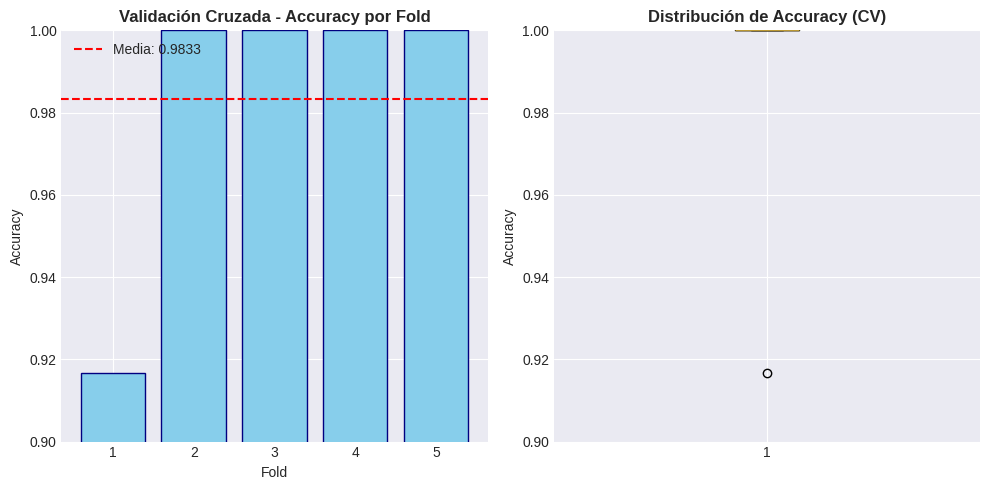

In [11]:
# Realizar validación cruzada
cv_scores = cross_val_score(best_svm, X_train_scaled, y_train, cv=5, scoring='accuracy')

print("Validación Cruzada (5-Fold):")
print(f"\nPuntuaciones por fold:")
for i, score in enumerate(cv_scores, 1):
    print(f"  Fold {i}: {score:.4f} ({score*100:.2f}%)")

print(f"\nEstadísticas:")
print(f"  Media: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
print(f"  Mínimo: {cv_scores.min():.4f}")
print(f"  Máximo: {cv_scores.max():.4f}")

# Visualizar
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(range(1, 6), cv_scores, color='skyblue', edgecolor='navy')
plt.axhline(y=cv_scores.mean(), color='red', linestyle='--', label=f'Media: {cv_scores.mean():.4f}')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Validación Cruzada - Accuracy por Fold', fontweight='bold')
plt.legend()
plt.ylim([0.9, 1.0])

plt.subplot(1, 2, 2)
plt.boxplot(cv_scores, vert=True)
plt.ylabel('Accuracy')
plt.title('Distribución de Accuracy (CV)', fontweight='bold')
plt.ylim([0.9, 1.0])

plt.tight_layout()
plt.show()

---

## 6. Guardar y Cargar el Modelo

In [13]:
import pickle

# Guardar el modelo y el scaler
modelo_archivo = 'modelo_svm_iris.pkl'
scaler_archivo = 'scaler_iris.pkl'

# Guardar
with open(modelo_archivo, 'wb') as f:
    pickle.dump(best_svm, f)

with open(scaler_archivo, 'wb') as f:
    pickle.dump(scaler, f)

print(f"Modelo guardado en: {modelo_archivo}")
print(f"Scaler guardado en: {scaler_archivo}")

# Cargar el modelo
with open(modelo_archivo, 'rb') as f:
    modelo_cargado = pickle.load(f)

with open(scaler_archivo, 'rb') as f:
    scaler_cargado = pickle.load(f)

print(f"\nModelo cargado correctamente")

# Probar el modelo cargado
nueva_muestra = np.array([[5.1, 3.5, 1.4, 0.2]])
nueva_muestra_scaled = scaler_cargado.transform(nueva_muestra)
prediccion = modelo_cargado.predict(nueva_muestra_scaled)

print(f"\nPrueba del modelo cargado:")
print(f"Muestra: {nueva_muestra[0]}")
print(f"Predicción: {iris.target_names[prediccion[0]]}")

Modelo guardado en: modelo_svm_iris.pkl
Scaler guardado en: scaler_iris.pkl

Modelo cargado correctamente

Prueba del modelo cargado:
Muestra: [5.1 3.5 1.4 0.2]
Predicción: setosa


---

## 7. Conceptos Clave de SVM

### Parámetros Importantes:

1. **C (Regularización)**:
   - **C pequeño** (ej. 0.1): Margen más amplio, permite más errores (puede subajustar)
   - **C grande** (ej. 100): Margen más estrecho, menos errores permitidos (puede sobreajustar)

2. **Kernel**:
   - **Linear**: Para datos linealmente separables
   - **RBF (Radial Basis Function)**: Para datos no lineales (más común)
   - **Polynomial**: Para patrones polinomiales
   - **Sigmoid**: Similar a redes neuronales

3. **Gamma** (solo para kernels no lineales):
   - **Gamma pequeño**: Influencia lejana, decisiones más generales
   - **Gamma grande**: Influencia local, decisiones más específicas

### Cuándo usar SVM:

✅ **Úsalo cuando:**
- Tienes datos de alta dimensión
- Las clases están bien separadas
- Necesitas precisión alta
- Dataset pequeño/mediano (< 10,000 muestras)

❌ **Evítalo cuando:**
- Tienes millones de muestras (es lento)
- Necesitas probabilidades (requiere calibración)
- Los datos son muy ruidosos

---

## 8. Ejemplo Práctico: Crear tu Propio Dataset

Ahora crearás y clasificarás tus propios datos.

Dataset 1: Linealmente Separable


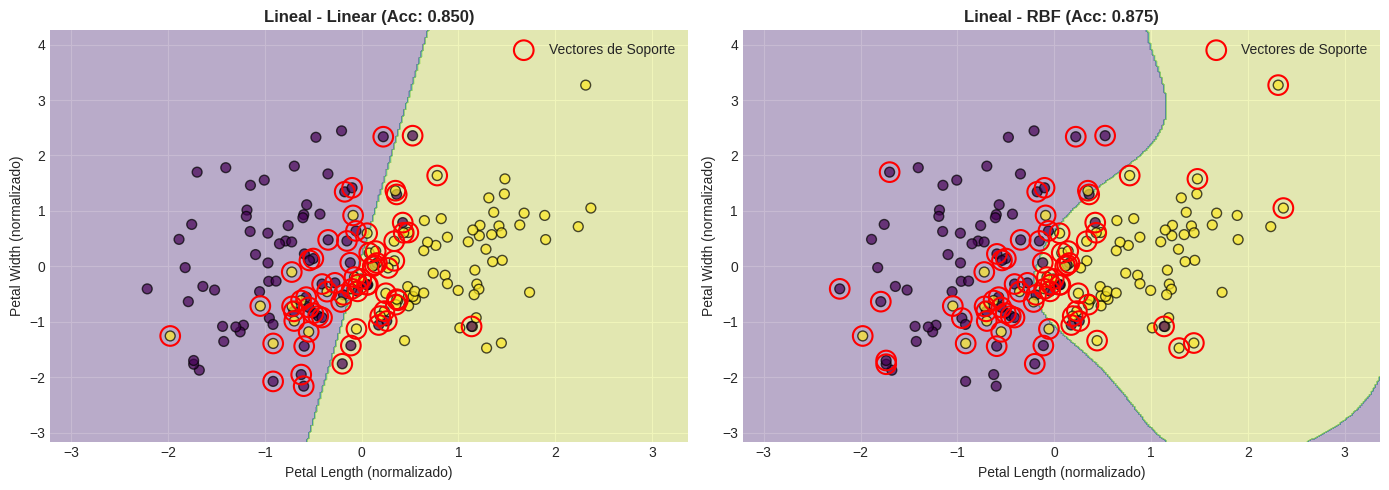


Dataset 2: Círculos Concéntricos (No Lineal)


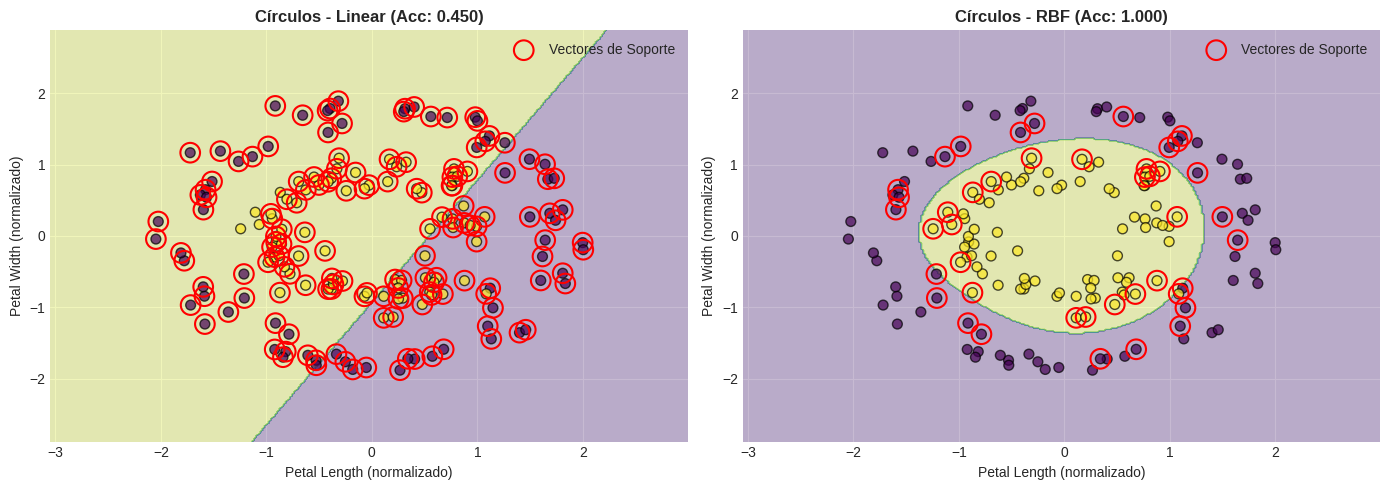


Dataset 3: Medias Lunas (No Lineal)


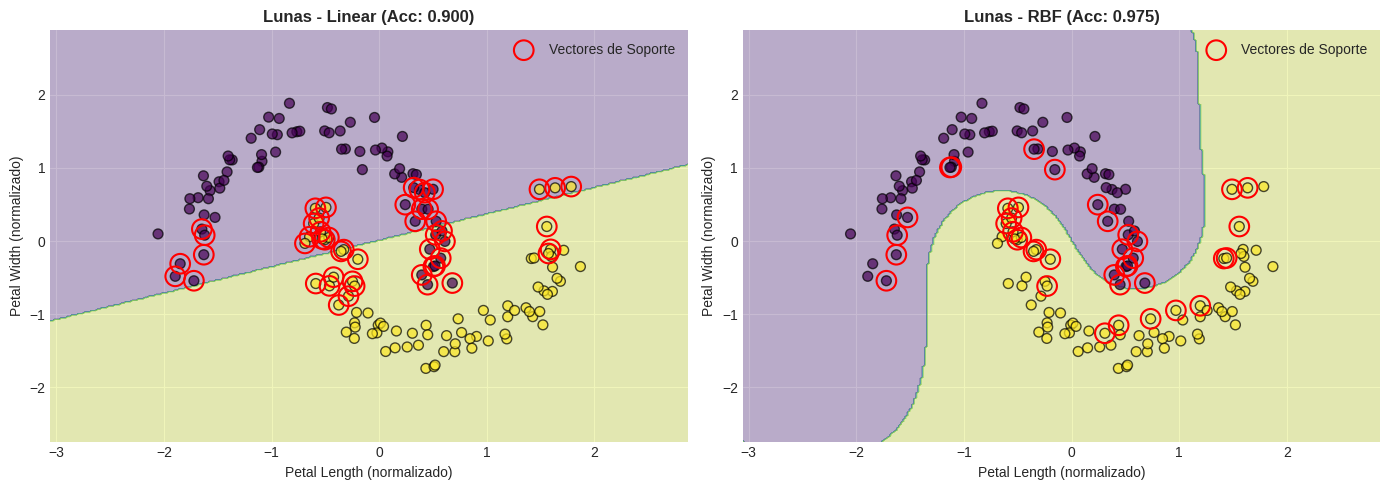


RESUMEN DE RESULTADOS
Dataset                   Linear          RBF            
------------------------------------------------------------
Linealmente Separable     0.8500          0.8750
Círculos Concéntricos     0.4500          1.0000
Medias Lunas              0.9000          0.9750

💡 Observación: El kernel RBF funciona mejor con datos no lineales


In [14]:
# Generar dataset sintético
from sklearn.datasets import make_classification, make_circles, make_moons

# Crear tres datasets diferentes
X_linear, y_linear = make_classification(n_samples=200, n_features=2, n_redundant=0, 
                                         n_informative=2, n_clusters_per_class=1, 
                                         random_state=42)

X_circles, y_circles = make_circles(n_samples=200, noise=0.1, factor=0.5, random_state=42)

X_moons, y_moons = make_moons(n_samples=200, noise=0.1, random_state=42)

# Función para entrenar y visualizar
def train_and_visualize_custom(X, y, title):
    # Dividir datos
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Normalizar
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Entrenar con diferentes kernels
    svm_lin = SVC(kernel='linear', C=1.0, random_state=42)
    svm_rbf = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
    
    svm_lin.fit(X_train_scaled, y_train)
    svm_rbf.fit(X_train_scaled, y_train)
    
    # Predecir
    acc_lin = accuracy_score(y_test, svm_lin.predict(X_test_scaled))
    acc_rbf = accuracy_score(y_test, svm_rbf.predict(X_test_scaled))
    
    # Visualizar
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    plot_decision_boundary(svm_lin, X_train_scaled, y_train, 
                          f'{title} - Linear (Acc: {acc_lin:.3f})', axes[0])
    plot_decision_boundary(svm_rbf, X_train_scaled, y_train, 
                          f'{title} - RBF (Acc: {acc_rbf:.3f})', axes[1])
    
    plt.tight_layout()
    plt.show()
    
    return acc_lin, acc_rbf

# Entrenar en cada dataset
print("=" * 60)
print("Dataset 1: Linealmente Separable")
print("=" * 60)
acc1_lin, acc1_rbf = train_and_visualize_custom(X_linear, y_linear, "Lineal")

print("\n" + "=" * 60)
print("Dataset 2: Círculos Concéntricos (No Lineal)")
print("=" * 60)
acc2_lin, acc2_rbf = train_and_visualize_custom(X_circles, y_circles, "Círculos")

print("\n" + "=" * 60)
print("Dataset 3: Medias Lunas (No Lineal)")
print("=" * 60)
acc3_lin, acc3_rbf = train_and_visualize_custom(X_moons, y_moons, "Lunas")

# Resumen
print("\n" + "=" * 60)
print("RESUMEN DE RESULTADOS")
print("=" * 60)
print(f"{'Dataset':<25} {'Linear':<15} {'RBF':<15}")
print("-" * 60)
print(f"{'Linealmente Separable':<25} {acc1_lin:.4f}          {acc1_rbf:.4f}")
print(f"{'Círculos Concéntricos':<25} {acc2_lin:.4f}          {acc2_rbf:.4f}")
print(f"{'Medias Lunas':<25} {acc3_lin:.4f}          {acc3_rbf:.4f}")
print("=" * 60)
print("\n💡 Observación: El kernel RBF funciona mejor con datos no lineales")

---

## 9. Resumen y Conclusiones

### 📚 Lo que aprendiste:

1. ✅ **Preparación de datos**: Carga, exploración, normalización y división
2. ✅ **Entrenamiento**: Modelos SVM con diferentes kernels (linear, RBF)
3. ✅ **Optimización**: GridSearchCV para encontrar mejores hiperparámetros
4. ✅ **Evaluación**: Accuracy, matrices de confusión, validación cruzada
5. ✅ **Predicciones**: Uso del modelo con nuevos datos
6. ✅ **Visualización**: Fronteras de decisión y vectores de soporte
7. ✅ **Persistencia**: Guardar y cargar modelos entrenados

### 🎯 Próximos Pasos:

- Prueba SVM con tus propios datos
- Experimenta con diferentes kernels y parámetros
- Compara SVM con otros algoritmos (Random Forest, XGBoost, etc.)
- Aplica SVM a problemas de visión por computador (clasificación de imágenes)

### 📖 Referencias:

- [Documentación scikit-learn SVM](https://scikit-learn.org/stable/modules/svm.html)
- [Understanding Support Vector Machines](https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/)

---

**¡Felicidades! 🎉 Has completado el tutorial de SVM**